In [1]:
import numpy as np
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.metrics import classification_report,accuracy_score

tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [2]:
inputs = keras.Input(shape=(4,))

In [3]:
dense = layers.Dense(64, activation='relu')

In [4]:
x = dense(inputs)
x = layers.Dense(32, activation='relu')(x)
y0 = layers.Dense(1, activation='sigmoid')(x)
y1 = layers.Dense(1, activation='sigmoid')(x)
y2 = layers.Dense(1, activation='sigmoid')(x)
y3 = layers.Dense(1, activation='sigmoid')(x)
y4 = layers.Dense(1, activation='sigmoid')(x)
y5 = layers.Dense(1, activation='sigmoid')(x)
y6 = layers.Dense(1, activation='sigmoid')(x)
y7 = layers.Dense(1, activation='sigmoid')(x)
y8 = layers.Dense(1, activation='sigmoid')(x)
y9 = layers.Dense(1, activation='sigmoid')(x)

In [5]:
model = keras.Model(inputs=inputs, outputs=[y0,y1,y2,y3,y4,y5,y6,y7,y8,y9], name='keras_model')

In [6]:
model.summary()

Model: "keras_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           320         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32)           2080        dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1)            33          dense_1[0][0]                    
________________________________________________________________________________________

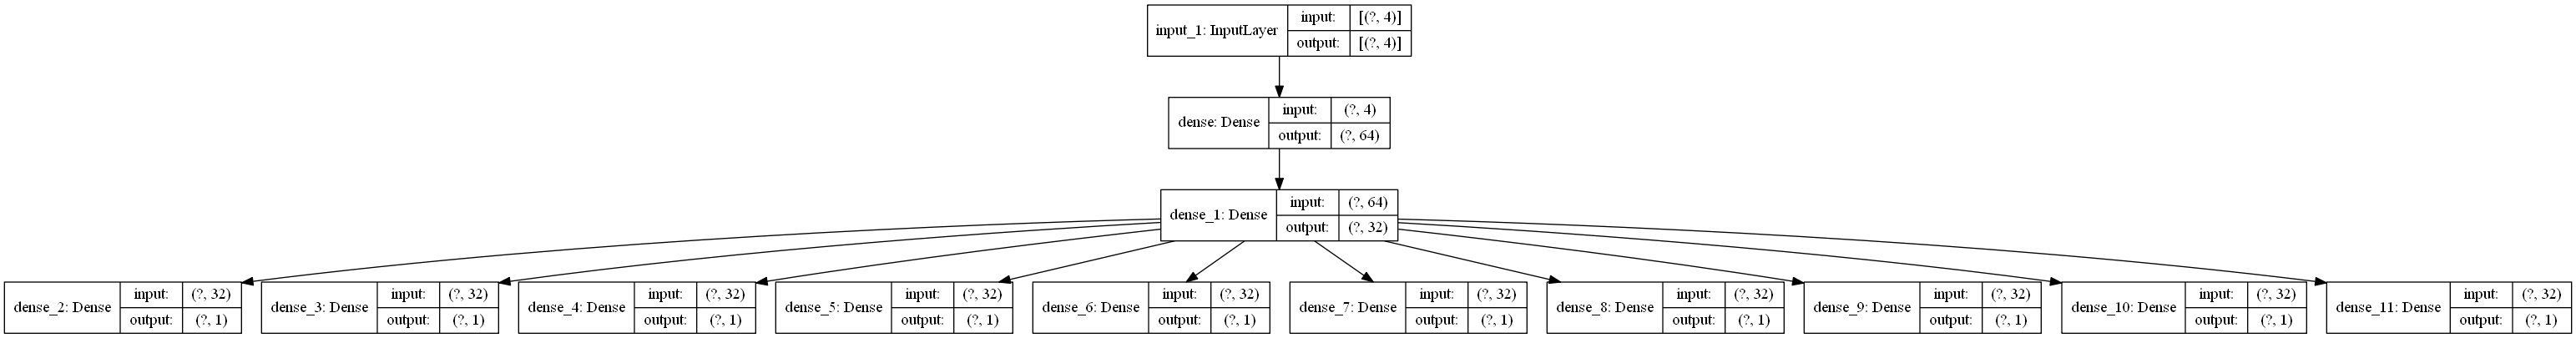

In [7]:
keras.utils.plot_model(model, 'my_keras_model.png', show_shapes=True)

In [8]:
    with open('features.pkl', 'rb') as file:
        X = pickle.load(file)
        X=np.array(X)

    with open('labels.pkl', 'rb') as file:
        Y = pickle.load(file)
        Y=np.array(Y)

In [9]:
def up_df(table,col):
    
    df_majority = table[table[col]==0]
    df_minority = table[table[col]==1]
    
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,   # sample with replacement
                                     n_samples=df_majority.shape[0]  # to match majority class
                                ) 
 
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    
    return df_upsampled

In [10]:
    columns_y=['y0','y1','y2','y3','y4','y5','y6','y7','y8','y9']
    y_df=pd.DataFrame(Y,columns=columns_y)
    
    columns_x=['age','gender','income','became_member_on']
    x_df=pd.DataFrame(X,columns=columns_x)
    
    table=pd.concat([x_df,y_df],axis=1)
    
    for col in columns_y:
        table=up_df(table,col)
    
    # Display new class counts
    #table['y0'].value_counts()
    scaler=MinMaxScaler()
    rescaled_data=scaler.fit_transform(table[columns_x])
    X_train, X_test, y_train, y_test = train_test_split(rescaled_data,\
                                                        table[columns_y], test_size=0.2)

In [11]:
table['y9'].value_counts()

1    1520126
0    1520126
Name: y9, dtype: int64

In [12]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss=[keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.BinaryCrossentropy(from_logits=True),
                    keras.losses.BinaryCrossentropy(from_logits=True)])

In [13]:
y_train=np.array(y_train)
y0v=y_train[:,0]
y1v=y_train[:,1]
y2v=y_train[:,2]
y3v=y_train[:,3]
y4v=y_train[:,4]
y5v=y_train[:,5]
y6v=y_train[:,6]
y7v=y_train[:,7]
y8v=y_train[:,8]
y9v=y_train[:,9]
y_train=[y0v,y1v,y2v,y3v,y4v,y5v,y6v,y7v,y8v,y9v]

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=10,
                    validation_split=0.2)

Train on 1945760 samples, validate on 486441 samples
Epoch 1/10
1945760/1945760 [==============================] - 607s 312us/sample - loss: 6.9028 - dense_2_loss: 0.6894 - dense_3_loss: 0.6935 - dense_4_loss: 0.6934 - dense_5_loss: 0.6935 - dense_6_loss: 0.6935 - dense_7_loss: 0.6901 - dense_8_loss: 0.6907 - dense_9_loss: 0.6922 - dense_10_loss: 0.6934 - dense_11_loss: 0.6742 - val_loss: 6.8895 - val_dense_2_loss: 0.6869 - val_dense_3_loss: 0.6932 - val_dense_4_loss: 0.6932 - val_dense_5_loss: 0.6932 - val_dense_6_loss: 0.6932 - val_dense_7_loss: 0.6889 - val_dense_8_loss: 0.6895 - val_dense_9_loss: 0.6918 - val_dense_10_loss: 0.6932 - val_dense_11_loss: 0.6667e_2_loss: 0.6894 - dense_3_loss: 0.6935 - dense_4_loss: 0.6934 - dense_5_loss: 0.6935 - d
Epoch 2/10
1945760/1945760 [==============================] - 614s 316us/sample - loss: 6.8867 - dense_2_loss: 0.6866 - dense_3_loss: 0.6933 - dense_4_loss: 0.6933 - dense_5_loss: 0.6933 - dense_6_loss: 0.6933 - dense_7_loss: 0.6886 - dense

In [ ]:
y_test=np.array(y_test)
y0v=y_test[:,0]
y1v=y_test[:,1]
y2v=y_test[:,2]
y3v=y_test[:,3]
y4v=y_test[:,4]
y5v=y_test[:,5]
y6v=y_test[:,6]
y7v=y_test[:,7]
y8v=y_test[:,8]
y9v=y_test[:,9]
y_test=[y0v,y1v,y2v,y3v,y4v,y5v,y6v,y7v,y8v,y9v]

In [ ]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

In [ ]:
predictions = model.predict(X_test)

In [ ]:
    for i in range(10): 
        #print(i)
        print('Column: {}'.format(i))
        print(accuracy_score(y_test[i],\
                                    pd.Series(predictions[i].reshape(-1)).map(lambda x:1 if x==1 else 0)))
        print(classification_report(y_test[i],\
                                    pd.Series(predictions[i].reshape(-1)).map(lambda x:1 if x==1 else 0)))


In [ ]:
# Save the weights
model.save_weights('my_model')
# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')